In [146]:
import pandas as pd
import numpy as np
import torch
import gpytorch 
import matplotlib.pyplot as plt
%matplotlib inline
from gpytorch.kernels import ScaleKernel, RBFKernel, MaternKernel

In [147]:
import bayesopt as bo
import imp
imp.reload(bo)
import gp_models
from gp_models import AdditiveExactGPModel, AdditiveKernel, ProjectedAdditiveExactGPModel, GeneralizedProjectionKernel, GeneralizedPolynomialProjectionKernel

In [148]:
import training_routines
import scipy
from scipydirect import minimize as DIRectMinimize

In [149]:
torch.nn.Linear(10, 1).weight.shape

torch.Size([1, 10])

In [150]:
def plot_box(corners):
    xs = [c[0] for c in corners]
    ys = [c[1] for c in corners]
    xs.append(corners[0][0])
    ys.append(corners[0][1])
    plt.plot(xs, ys, color='black')

In [151]:
def get_corners_from_bounds(bounds):
    corners = [[bounds[0][0],bounds[1][0]],
               [bounds[0][1],bounds[1][0]],
               [bounds[0][1],bounds[1][1]],
               [bounds[0][0],bounds[1][1]]]
    return corners

In [152]:
def map_corners(corners, projection):
    corners = torch.tensor(corners, dtype=torch.float)
    mapped_corners = projection(corners)
#     mapped_corners = corners.matmul(projection.weight)    
    return mapped_corners.tolist()

In [153]:
d = 2
bounds = [(-4, 4) for _ in range(d)]
def objective_function(x):
    print('queries x=', x)
    res = bo.stybtang(x)
    print('Obtained', res)
    return res

trainX = torch.tensor([], dtype=torch.float)
trainY = torch.tensor([], dtype=torch.float)
lik = gpytorch.likelihoods.GaussianLikelihood()
lik.initialize(noise=0.01)
lik.raw_noise.requires_grad = False
kernel = training_routines.create_rp_poly_kernel(d, 1, d, None, learn_proj=False, weighted=True,
                                                 kernel_type='RBF', space_proj=True)
kernel.projection_module.bias.requires_grad = False
# kernel = training_routines.create_full_kernel(d, ard=True, kernel_type='Matern')
# kernel = training_routines.create_additive_kernel(d, kernel_type='Matern')
kernel = gpytorch.kernels.ScaleKernel(kernel)
# model = AdditiveExactGPModel(trainX, trainY, lik, kernel)
model = ProjectedAdditiveExactGPModel(trainX, trainY, lik, kernel)
inner_optimizer = 'quasirandom'
gp_optim_options = dict(max_iter=20, optimizer=torch.optim.Adam, verbose=False, lr=0.1, check_conv=False)

optimizer = bo.BayesOpt(objective_function, bounds, model, 'add_ucb', inner_optimizer,
                        gp_optim_freq=5, gp_optim_options=gp_optim_options, initial_points=10)


In [154]:
kernel.base_kernel.kernel.kernels[0].base_kernel.kernels[0].lengthscale

tensor([[1.0000]], grad_fn=<SoftplusBackward>)

In [155]:
kernel.base_kernel.kernel.kernels[1].base_kernel.kernels[0].lengthscale

tensor([[1.0000]], grad_fn=<SoftplusBackward>)

In [156]:
with gpytorch.settings.lazily_evaluate_kernels(True):
    optimizer.initialize()

queries x= tensor([[-2.0859,  2.8116],
        [ 0.6282, -2.5995],
        [ 3.3126,  2.1764],
        [-2.4594,  3.4674],
        [ 3.1767, -3.7673],
        [-0.5790, -0.0800],
        [ 1.3751, -1.1756],
        [ 1.6225,  0.0444],
        [-1.1589, -2.0438],
        [-3.7123,  1.3630]])
Obtained tensor([-55.5235, -39.2349, -40.5322, -51.4845, -44.1165,  -4.3240, -22.9412,
        -13.4438, -42.5419, -34.2999])


/Users/idelbridge/Scalable_GPs/gp_models.py:638: RuntimeWarning: Mean of empty slice.
  ma[i] = losses[i-patience+1:i+1].mean()
/Users/idelbridge/miniconda3/envs/GPyTorchEnv/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [157]:
optimizer.model.covar_module.base_kernel.projection_module.weight

Parameter containing:
tensor([[-0.8630,  0.5052],
        [ 0.5003,  0.8659]])

In [158]:
optimizer.steps(20)

tensor(-55.5235)
queries x= tensor([[-4.4340, -1.6456]])
Obtained tensor([2.7806])
0 tensor(-55.5235) noise 0.010, outputscale=1.8


/Users/idelbridge/Scalable_GPs/bayesopt.py:435: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  newX = torch.tensor(res.x, dtype=torch.float)


queries x= tensor([[-1.3363,  3.9066]])
Obtained tensor([-11.9008])
1 tensor(-55.5235) noise 0.010, outputscale=1.8
queries x= tensor([[5.6751, 3.0294]])
Obtained tensor([251.4302])
2 tensor(-55.5235) noise 0.010, outputscale=1.8
queries x= tensor([[ 3.5427, -4.7770]])
Obtained tensor([53.0734])
3 tensor(-55.5235) noise 0.010, outputscale=1.8
queries x= tensor([[ 1.9424, -3.7790]])
Obtained tensor([-39.9322])
4 tensor(-55.5235) noise 0.010, outputscale=1.7
queries x= tensor([[ 2.4867, -3.5285]])
Obtained tensor([-55.0512])
5 tensor(-55.5235) noise 0.010, outputscale=1.7
queries x= tensor([[ 2.4837, -3.5130]])
Obtained tensor([-55.4740])
6 tensor(-55.5235) noise 0.010, outputscale=1.7
queries x= tensor([[ 2.4823, -3.5054]])
Obtained tensor([-55.6747])
7 tensor(-55.6747) noise 0.010, outputscale=1.7
queries x= tensor([[ 2.4903, -3.4991]])
Obtained tensor([-55.8994])
8 tensor(-55.8994) noise 0.010, outputscale=1.7
queries x= tensor([[ 2.4897, -3.4909]])
Obtained tensor([-56.1176])
9 tenso

In [159]:
res = optimizer._maximize_projected_additive_acq()

Text(0.5, 1.0, 'Predicted Objective Function')

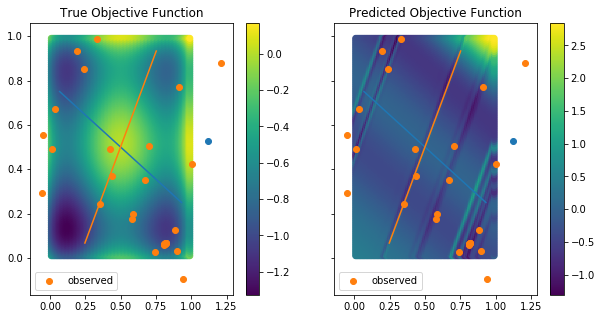

In [160]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
plt.sca(axes[0])
X = bo.easy_meshgrid([100, 100], False)
Xscaled = bo.scale_to_bounds(X, [[-4, 4], [-4, 4]])
y = optimizer.descale_y(bo.stybtang(Xscaled))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar()
P = optimizer.model.covar_module.base_kernel.projection_module.weight
for i in range(d):
    plt.plot([-P[0,i]/2+.5, P[0,i]/2+.5], [-P[1, i]/2+.5, P[1, i]/2+.5])
plt.scatter([res.x[0, 0].numpy()],[res.x[0,1].numpy()])
plt.scatter(optimizer.obsX[:, 0], optimizer.obsX[:, 1], label='observed')
plt.legend()
plt.title('True Objective Function')

plt.sca(axes[1])
with torch.no_grad():
    pred_y = model(X).mean
plt.scatter(X[:, 0], X[:, 1], c=pred_y)
plt.colorbar()
for i in range(d):
    plt.plot([-P[0,i]/2+.5, P[0,i]/2+.5], [-P[1, i]/2+.5, P[1, i]/2+.5])
plt.scatter([res.x[0, 0].numpy()],[res.x[0,1].numpy()])
plt.scatter(optimizer.obsX[:, 0], optimizer.obsX[:, 1], label='observed')
plt.legend()
plt.title('Predicted Objective Function')
# plt.xlim(0, 1)
# plt.ylim(0, 1)

Text(0.5, 1.0, 'Predicted Objective Function (In Z space)')

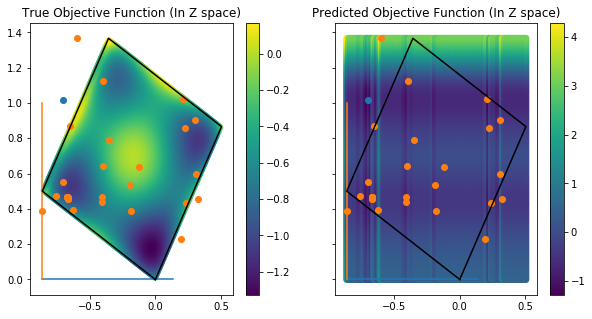

In [161]:
add_model, proj = optimizer.model.get_corresponding_additive_model()

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
plt.sca(axes[0])
with torch.no_grad():
    Z = optimizer.model.covar_module.base_kernel.projection_module(X)
    obsZ = proj(optimizer.obsX)
b = torch.clamp(proj.weight, min=0).sum(dim=1)
a = torch.clamp(proj.weight, max=0).sum(dim=1)
opt_dim = proj.weight.shape[1]
bounds = [[a[i], b[i]] for i in range(len(a))]
plt.scatter(Z[:, 0], Z[:, 1], c=y)
plt.colorbar()
for i in range(d):
    v = np.array([0, 0])
    v[i] = 1
    plt.plot([bounds[0][0], bounds[0][0]+v[0]], [bounds[1][0], bounds[1][0]+v[1]])
plt.scatter([res.z[0, 0].numpy()],[res.z[0,1].numpy()])
plt.scatter(obsZ[:, 0], obsZ[:, 1], label='observed')
real_bounds = [[0, 1] for _ in range(d)]
plot_box(map_corners(get_corners_from_bounds(real_bounds), proj))
plt.title('True Objective Function (In Z space)')
# plt.xlim(a[0], b[0])
# plt.ylim(a[1], b[1])

plt.sca(axes[1])
full_z = bo.easy_meshgrid([100, 100], interior=False)
full_z = bo.scale_to_bounds(full_z, bounds)
add_model.eval()
with torch.no_grad():
    pred_y = add_model(full_z).mean
    pred1, pred2 = add_model.additive_pred(full_z)
    pred1 = pred1.mean
    pred2 = pred2.mean
plt.scatter(full_z[:, 0], full_z[:, 1], c=pred_y)

plt.colorbar()
for i in range(d):
    v = np.array([0, 0])
    v[i] = 1
    plt.plot([bounds[0][0], bounds[0][0]+v[0]], [bounds[1][0], bounds[1][0]+v[1]])
plt.scatter([res.z[0, 0].numpy()],[res.z[0,1].numpy()])
plt.scatter(obsZ[:, 0], obsZ[:, 1], label='observed')
real_bounds = [[0, 1] for _ in range(d)]
plot_box(map_corners(get_corners_from_bounds(real_bounds), proj))
plt.title('Predicted Objective Function (In Z space)')

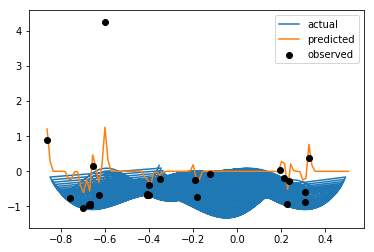

In [162]:
plt.plot(Z[:,0].numpy(), y.numpy(), label='actual')
plt.plot(full_z[:,0].numpy(), pred1.numpy(), label='predicted')
plt.scatter(obsZ[:, 0].numpy(), optimizer.obsY.numpy(), label='observed', color='black', zorder=3)
plt.legend()

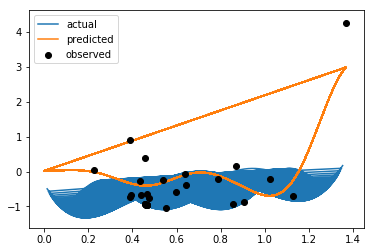

In [163]:
plt.plot(Z[:,1].numpy(), y.numpy(), label='actual')
plt.plot(full_z[:,1].numpy(), pred2.numpy(), label='predicted')
plt.scatter(obsZ[:, 1].numpy(), optimizer.obsY.numpy(), label='observed', color='black', zorder=3)
plt.legend()

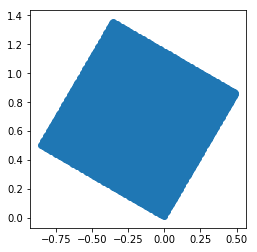

In [170]:
with torch.no_grad():
    p = proj(X)
ax = plt.gca()
ax.set_aspect('equal')
plt.scatter(p[:, 0].numpy(), p[:, 1].numpy())

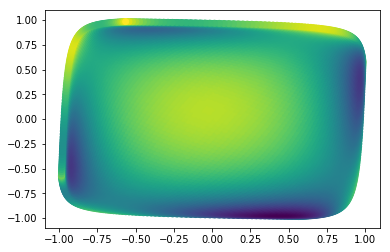

In [167]:
with torch.no_grad():
    p = torch.tanh(5*((proj(X) - a) / (b-a) - 0.5))
    plt.scatter(p[:, 0].numpy(), p[:, 1].numpy(), c=y)

In [173]:
kernel = training_routines.create_rp_poly_kernel(d, 1, d, None, learn_proj=False, weighted=True,
                                                 kernel_type='RBF', space_proj=True)
kernel.projection_module.bias.requires_grad = False
# kernel = training_routines.create_full_kernel(d, ard=True, kernel_type='Matern')
# kernel = training_routines.create_additive_kernel(d, kernel_type='Matern')
kernel = gpytorch.kernels.ScaleKernel(kernel)
# model = AdditiveExactGPModel(trainX, trainY, lik, kernel)
model = ProjectedAdditiveExactGPModel(X, y, lik, kernel)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(model.likelihood, model)

In [ ]:
with gpytorch.settings.fast_computations(True, True, True):
    gp_models.train_to_convergence(model, X, y, torch.optim.Adam,)